# 现代卷积神经网络
>* AlexNet,它是第一个在大规模视觉竞赛中击败传统计算机视觉模型的大型神经网络
>* 使用重复块的网络(VGG),它利用许多重复的神经网络块
>* 网络中的网络(NiN),它重复使用由卷积层和1x1卷积层(用来代替全连接层)来构建深层网络
>* 含并行连接的网络(GoogLeNet),它使用并行连接的网络,通过不同窗口大小的卷积层和最大汇聚层来抽取信息
>* 残差网络(ResNet),它通过残差块构建跨层的数据通道,是计算机视觉中最流行的体系架构.
>* 稠密连接网络(DenseNet),它的计算成本很高,但给我们带来了更好的效果.

虽然深度神经网络的概念非常简单,将神经网络堆叠在一起,但由于不同的网络架构和超参数选择,这些神经网络的性能会发生很大变化,本章介绍的神经网络时将人类直觉和相关数学见解结合后,经过大量研究试错后的结晶
## 深度卷积神经网络(AlexNet)
1.AlexNet比相对较小的LeNet5要深的多,AlexNet由8层组成:5个卷积层,两个全连接隐藏层,和一个全连接输出层
2.AlexNet使用ReLU而不是sigmoid作为其激活函数
**模型设计**
在AlexNet的第一层,卷积窗口的形状是11x11,第二层的卷积窗口被缩减为5x5,然后是3x3,此外在第一层,第二层和第五层卷积层之后,加入窗口形状为3x3,步幅为2的最大汇聚层,AlexNet的卷积通道数目是LeNet的10倍
在最后一个卷积层之后有两个全连接层,分别有4096个输出,这两个巨大的全连接层拥有将近1GB的模型参数,由于早期GPU显存有限,原版的AlexNet采用了双数据流设计,使得每个GPU只负责存储和计算模型的一半参数.
**激活函数**
ReLU激活函数的计算更加简单,它不需要如sigmoid激活函数那般复杂的求幂运算

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

net=nn.Sequential(
    #使用11x11的窗口来捕捉对象
    #步幅为4以减少输出的宽度和高度
    #输出通道的数目远大于LeNet
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    #减小卷积窗口,使用填充为2来使得输入和输出的高和宽一直,且增大输出通道数
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    #使用三个连续的卷积层和较小的卷积窗口
    #除了最后的卷积层,输出通道数量进一步增加
    #在前两个卷积层之后,汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    #这里,全连接层的输出数量是LeNet中的好几倍,使用dropout层来减轻过拟合
    nn.Linear(6400,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    #最后是输出层,由于这里使用Fashion-MNIST,所以用类别为10,
    nn.Linear(4096,10)
)

In [3]:
#构造一个高度和宽度都为224的单通道数据,来观察每一层输出的形状
X=torch.randn(1,1,224,224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [4]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)

KeyboardInterrupt: 

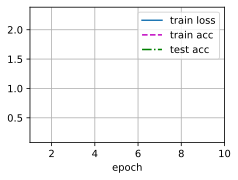

In [ ]:
lr,num_epochs=0.01,10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

电脑有GPU但是不知道为什么用不了
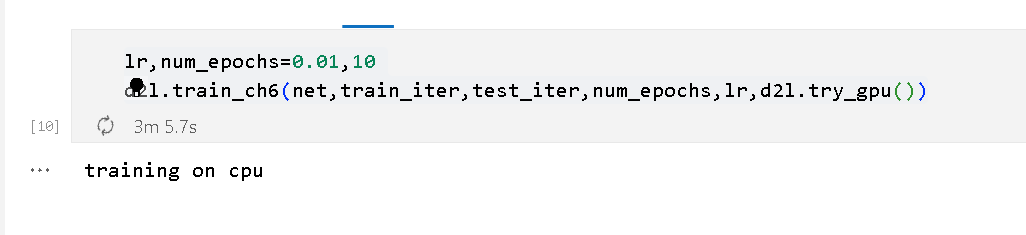
这里训练时间过长就不放结果了
我安装了cuda,不知道是不是安装了CPU版本的pytorch,先不卸载往下学着.

In [ ]:
import torch
print(torch.version.cuda)

None


In [ ]:
import torch
print(torch.cuda.is_available())#安装了版本兼容的cuda但是找不到,环境变量也配置好了,cudnn也安装了且环境变量配置正确

False


## 使用块的网络(VGG)
虽然AlexNet证明深层神经网络卓有成效,但它没有提供一个通用的模版来指导后续的研究人员设计新的网络.
**VGG块**
经典卷积神经网络的基本组成事下面的这个序列:
1.带填充以保持分辨率的卷积层;
2.非线性激活函数,如ReLU;
3.汇聚层,如最大汇聚层
而一个VGG块与之类似,由一系列卷积层组成,后面再加上用于空间下采样的最大汇聚层,在最初的VGG论文中,作者使用了带有3x3卷积核,填充为1的卷积层,和带有2*2汇聚窗口,步幅为2的最大汇聚层

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

#定义一个名为vgg_block的函数来实现一个VGG块
#3个参数,num_convs卷积层的数量,in_channels输入通道的数量,out_channels输出通道的数量
def vgg_block(num_convs,in_channels,out_channels):
    layers=[]
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
        layers.append(nn.ReLU())
        in_channels=out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

**VGG网络**
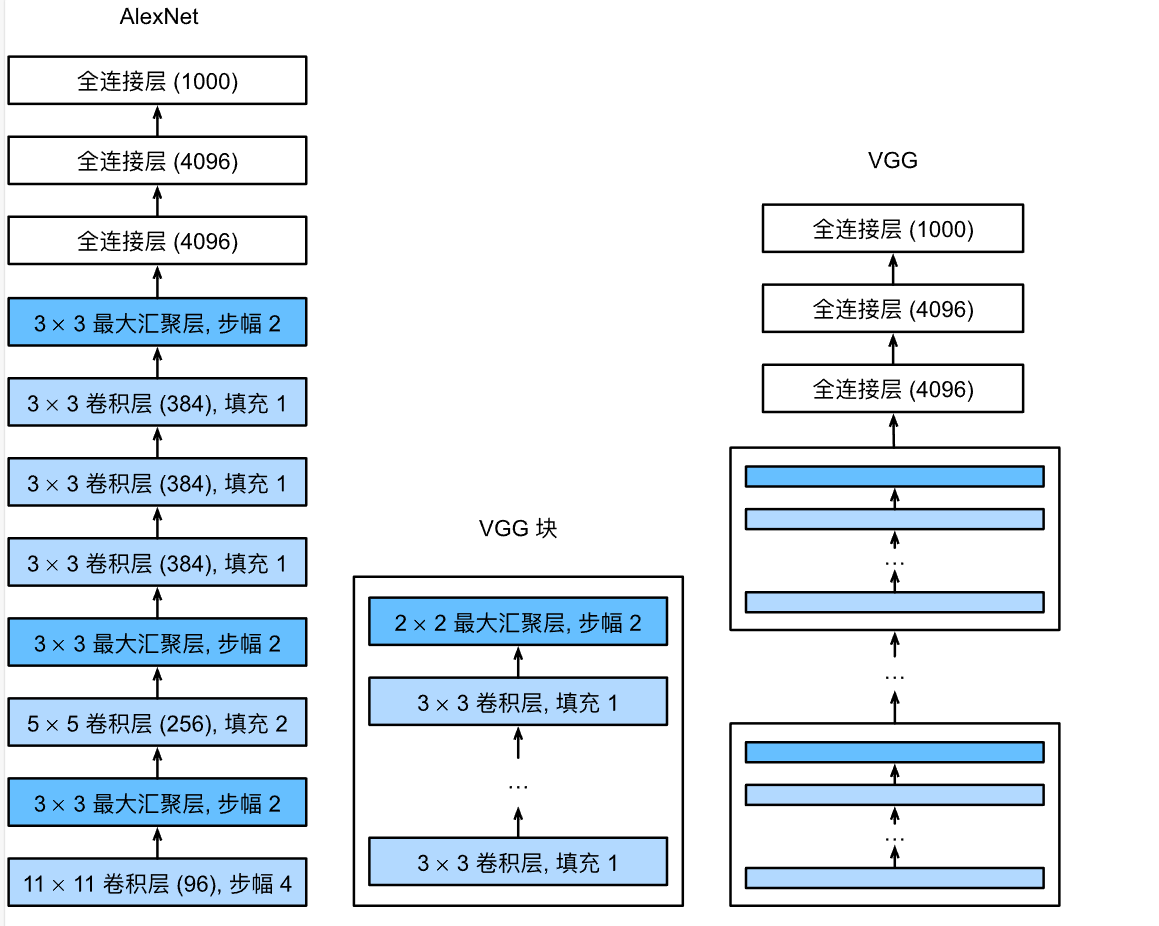
VGG网络连接着图中的几个VGG块,全连接模块与AlexNet网络相同,原始VGG网络有5个卷积块,其中前两个块各有一个卷积层,后三个块各包含两个卷积层,第一层模块有64个输出通道,后续模块将输出通道数量翻倍,直到数字达到512,该网络使用8个卷积层和3个全连接层,因此它通常被称为VGG-11

In [ ]:
conv_arch=((1,64),(1,128),(2,256),(2,512),(2,512))

In [ ]:
def vgg(conv_arch):
    conv_blks=[]
    in_channels=1
    #卷积层部分
    for(num_convs,out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
        in_channels=out_channels
    return nn.Sequential(
        *conv_blks,nn.Flatten(),
        #全连接层部分
        nn.Linear(out_channels*7*7,4096),nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(4096,10)
    )
net=vgg(conv_arch)

In [ ]:
#构建一个高度和宽度为224的单通道数据样本,以观察每个层的输出的形状
X=torch.randn(size=(1,1,224,224))
for blk in net:
    X=blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)


Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
#构建一个通道数较少的网络,足够用于训练Fashion-MNIST数据集
ratio=4
small_conv_arch=[(pair[0],pair[1]//ratio)for pair in conv_arch]
net=vgg(small_conv_arch)


training on cpu


KeyboardInterrupt: 

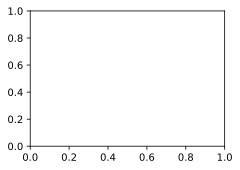

In [ ]:
lr,num_epochs,batch_size=0.05,10,128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

## 批量规范化
批量规范化可以持续加速深层网络的收敛速度,批量规范化使得研究人员能够训练100层以上的网络
现代的卷积网络,都或多或少的用到批量归一化层,2016年左右提出的
* 损失出现在最后,后面的层训练较快
* 数据在最底部
  * 底部的层训练较慢
  * 底部层一变化,所有都得跟着变
  * 最后的那些层需要重新学习多次
  * 导致收敛变慢
* 我们可以在学习底部层的时候避免变化顶部层吗?
**核心思路**
* 固定小批量里面的均值和方差,然后再做额外的调整
批量归一化层作用在全连接层和卷积层的输出上,在激活函数前,作用在全连接层和卷积层输出上
对全连接层,作用在特征维
对于卷积层,作用在通道维

In [10]:
import torch
from torch import nn
from d2l import torch as d2l


def batch_norm(X,gamma,beta,moving_mean,moving_var,eps,momentum):
    """
    x是输入数据,gamma和beta是可学习的参数,用于调整归一化后的输出,
    moving_mean,moving_var是移动平均的均值和方差,用于预测阶段
    eps是一个很小的数,防止除0,momentum动量超参数,用于更新移动平均的均值和方差  
    """
    #通过is_grad_enabled来判断当前模式是训练模式还是预测模式
    if not torch.is_grad_enabled():
        #如果是在预测模式下,直接使用传入的移动平均所得的均值和方差
        #预测模式不计算梯度
        X_hat=(X-moving_mean)/torch.sqrt(moving_var+eps)
    else:
        assert len(X.shape)in(2,4)
        if len(X.shape)==2:
            #使用全连接层的情况,计算特征维上的均值和方差
            mean=X.mean(dim=0)
            var=((X-mean)**2).mean(dim=0)
        else:
            #使用二维卷积层的情况,计算通道维上的(axis=1)均值和方差
            #这里我们需要保持X的形状以便后面可以做广播运算
            mean=X.mean(dim=(0,2,3),keepdim=True)
            var=((X-mean)**2).mean(dim=(0,2,3),keepdim=True)
            """
            如果输入的X是二维的,计算每个特征维度的均值和方差
            如果输入的X是四维的,计算每个通道维度上的均值和方差,并保持输入的形状以便后续的广播运算
            """

        #训练模式下,用当前的均值和方差做标准化
        X_hat=(X-mean)/torch.sqrt(var+eps)
        #更新移动平均的均值和方差
        moving_mean=momentum*moving_mean+(1.0-momentum)*mean
        moving_var=momentum*moving_var+(1.0-momentum)*var
    Y=gamma*X_hat+beta
    return Y,moving_mean.data,moving_var.data


In [12]:
# 创建一个正确的BatchNorm图层
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features) # num_features 为 feature map 的多少，即通道数的多少  
        else:
            shape = (1, num_features,1,1)
        self.gamma = nn.Parameter(torch.ones(shape)) # 伽马初始化为全1，贝塔初始化为全0
        self.beta = nn.Parameter(torch.zeros(shape)) # 伽马为要拟合的均值，贝塔为要拟合的方差
        self.moving_mean = torch.zeros(shape) # 伽马、贝塔需要在反向传播时更新，所以放在nn.Parameter里面，moving_mean、moving_var不需要迭代，所以不放在里面      
        self.moving_var = torch.ones(shape)
        
    def forward(self, X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device) # 
            self.moving_var = self.moving_var.to(X.device)
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta,self.moving_mean,self.moving_var,
            eps=1e-5,momentum=0.9)
        return Y

In [14]:
# 应用BatchNorm于LeNet模型
net = nn.Sequential(nn.Conv2d(1,6,kernel_size=5),BatchNorm(6,num_dims=4), # 在第一个卷积后面加了BatchNorm                       
                   nn.Sigmoid(),nn.MaxPool2d(kernel_size=2,stride=2),
                   nn.Conv2d(6,16,kernel_size=5),BatchNorm(16,num_dims=4), # BatchNorm的feature map为卷积层的输出通道数。这里BatchNorm加在激活函数前面。      
                   nn.Sigmoid(),nn.MaxPool2d(kernel_size=2,stride=2),      
                   nn.Flatten(),nn.Linear(16*4*4,120),
                   BatchNorm(120,num_dims=2),nn.Sigmoid(),
                   nn.Linear(120,84),BatchNorm(84,num_dims=2),
                   nn.Sigmoid(),nn.Linear(84,10))   

training on cpu


KeyboardInterrupt: 

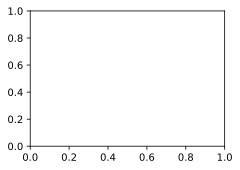

In [15]:
# 在Fashion-MNIST数据集上训练网络
lr,num_epochs,batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())  